# Machine Learning 1 Final Project
# Chocolate Bar Ratings


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Introduction To Your Dataset
## The business background
Chocolate ratings among different variables such as company/location/bean origin/cocoa percent/review date etc.

## Why you choose this specific dataset to work on?
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

## Which is the point/question you try to solve?
##### Where are the best cocoa beans grown?
##### Which companies produce the highest-rated bars?
##### What’s the relationship between cocoa solids percentage and rating?

In [2]:
data = pd.read_csv("flavors_of_cacao.csv")

# Exploratory Data Analysis
## Analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us

In [3]:
data.head()

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company                    1795 non-null object
Bean Origin or Bar Name    1795 non-null object
REF                        1795 non-null int64
Review Date                1795 non-null int64
Cocoa Percent              1795 non-null object
Company Location           1795 non-null object
Rating                     1795 non-null float64
Bean Type                  1794 non-null object
Broad Bean Origin          1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [5]:
data.nunique()

Company                     416
Bean Origin or Bar Name    1039
REF                         440
Review Date                  12
Cocoa Percent                45
Company Location             60
Rating                       13
Bean Type                    41
Broad Bean Origin           100
dtype: int64

In [6]:
#Converting string to float
def from_percentage_to_value(per):
    per = per.strip('%')
    value = float(per)
    return value

In [7]:
#Applying function to make cocoa percent a float value
data['Cocoa Percent'] = data['Cocoa Percent'].apply(from_percentage_to_value)

In [8]:
data.head()

,Company,Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [9]:
#Min/Max/Mean of Cocoa Percent
print (data['Cocoa Percent'].min())
print (data['Cocoa Percent'].max())
print (data['Cocoa Percent'].mean())

42.0
100.0
71.6983286908078


In [10]:
#Min/Max/Mean of Chocolate rating
print(data['Rating'].min())
print(data['Rating'].max())
print(data['Rating'].mean())

1.0
5.0
3.185933147632312


In [11]:
#Min/Max/Mean of rating based on review year
print (data.groupby('Review Date').min()['Rating'])
print (data.groupby('Review Date').max()['Rating'])
print (data.groupby('Review Date').mean()['Rating'])

Review Date
2006    1.00
2007    1.00
2008    1.00
2009    1.50
2010    1.50
2011    1.50
2012    1.50
2013    1.75
2014    2.00
2015    2.00
2016    2.00
2017    2.50
Name: Rating, dtype: float64
Review Date
2006    5.00
2007    5.00
2008    4.00
2009    4.00
2010    4.00
2011    4.00
2012    4.00
2013    4.00
2014    4.00
2015    4.00
2016    4.00
2017    3.75
Name: Rating, dtype: float64
Review Date
2006    3.125000
2007    3.162338
2008    2.994624
2009    3.073171
2010    3.148649
2011    3.256061
2012    3.178205
2013    3.197011
2014    3.189271
2015    3.246491
2016    3.226027
2017    3.312500
Name: Rating, dtype: float64


In [12]:
#Location which makes the highest rated chocolate
best_location = data['Rating'].max()
select_rows = data['Rating'] == best_location
data[select_rows]['Broad Bean Origin']

data[data['Rating'] == data['Rating'].max()]['Broad Bean Origin']

78    Venezuela
86             
Name: Broad Bean Origin, dtype: object

In [13]:
#Location which makes the lowest rated chocolate
worst_location = data['Rating'].min()
select_rows = data['Rating'] == worst_location
data[select_rows]['Broad Bean Origin']

data[data['Rating'] == data['Rating'].min()]['Broad Bean Origin']

326                 Ecuador
437     Sao Tome & Principe
465                        
1175                       
Name: Broad Bean Origin, dtype: object

In [14]:
#Company/(s) which makes the highest rated chocolate
highest_rated = data['Rating'].max()
select_rows = data['Rating'] == highest_rated
data[select_rows]['Company']

data[data['Rating'] == data['Rating'].max()]['Company']

78    Amedei
86    Amedei
Name: Company, dtype: object

In [15]:
#Company/(s) which makes the lowest rated chocolate
lowest_rated = data['Rating'].min()
select_rows = data['Rating'] == lowest_rated
data[select_rows]['Company']

data[data['Rating'] == data['Rating'].min()]['Company']

326               Callebaut
437         Claudio Corallo
465      Cote d' Or (Kraft)
1175    Neuhaus (Callebaut)
Name: Company, dtype: object

In [16]:
#Company whose chocolate is reviewed the most number of times
data['Company'].value_counts().head()

Soma        47
Bonnat      27
Fresco      26
Pralus      25
A. Morin    23
Name: Company, dtype: int64

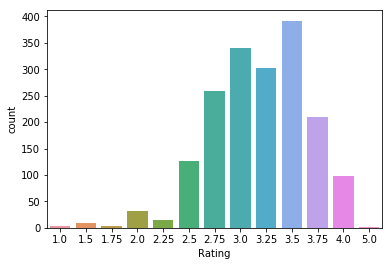

In [17]:
#Number of ratings
sns.countplot(x = data['Rating'])

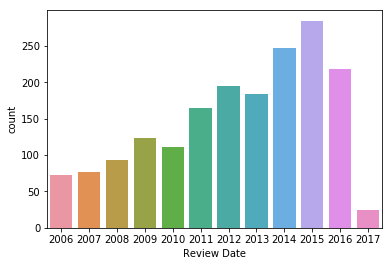

In [18]:
#Number of reviews made per year
sns.countplot(data=data, x='Review Date')

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


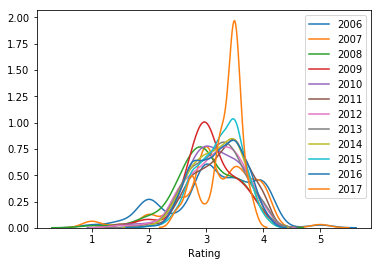

In [19]:
#Distplot of Chocolate rating for each year
select_2006 = data['Review Date'] == 2006
select_2007 = data['Review Date'] == 2007
select_2008 = data['Review Date'] == 2008
select_2009 = data['Review Date'] == 2009
select_2010 = data['Review Date'] == 2010
select_2011 = data['Review Date'] == 2011
select_2012 = data['Review Date'] == 2012
select_2013 = data['Review Date'] == 2013
select_2014 = data['Review Date'] == 2014
select_2015 = data['Review Date'] == 2015
select_2016 = data['Review Date'] == 2016
select_2017 = data['Review Date'] == 2017
sns.distplot(data[select_2006]['Rating'], hist=False, label='2006')
sns.distplot(data[select_2007]['Rating'], hist=False, label='2007')
sns.distplot(data[select_2008]['Rating'], hist=False, label='2008')
sns.distplot(data[select_2009]['Rating'], hist=False, label='2009')
sns.distplot(data[select_2010]['Rating'], hist=False, label='2010')
sns.distplot(data[select_2011]['Rating'], hist=False, label='2011')
sns.distplot(data[select_2012]['Rating'], hist=False, label='2012')
sns.distplot(data[select_2013]['Rating'], hist=False, label='2013')
sns.distplot(data[select_2014]['Rating'], hist=False, label='2014')
sns.distplot(data[select_2015]['Rating'], hist=False, label='2015')
sns.distplot(data[select_2016]['Rating'], hist=False, label='2016')
sns.distplot(data[select_2017]['Rating'], hist=False, label='2017')

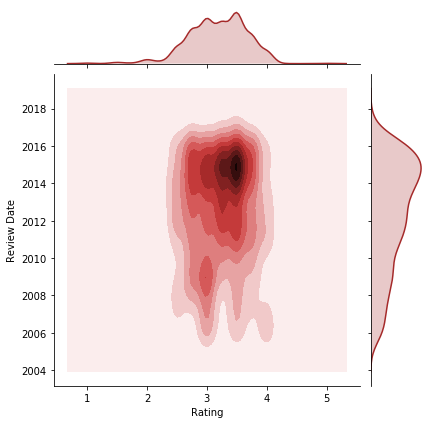

In [20]:
#Rating and review date concentrations
sns.jointplot(x = 'Rating', y= 'Review Date', data = data, kind='kde', color = 'brown')

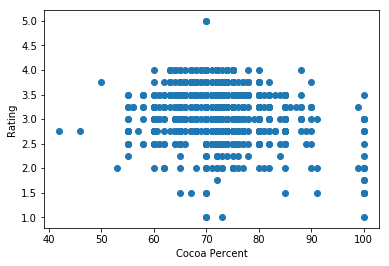

In [21]:
plt.scatter(x=data['Cocoa Percent'], y=data['Rating'])
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.show()

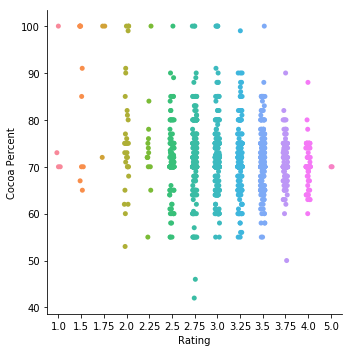

In [22]:
sns.catplot(x='Rating', y = 'Cocoa Percent', data = data)

# Build and Evaluate Model
## Build model


In [23]:
#featurizing text (one-hot encoding to allow the data to be used in logistic regression/dtc/rfc)
company = pd.get_dummies(data['Company'],drop_first=True)
sbOrigin = pd.get_dummies(data['Bean Origin or Bar Name'],drop_first=True)
companyLocation = pd.get_dummies(data['Company Location'],drop_first=True)
bType = pd.get_dummies(data['Bean Type'],drop_first=True)
bbOrigin = pd.get_dummies(data['Broad Bean Origin'],drop_first=True)

In [24]:
data = pd.concat([data, company, sbOrigin, companyLocation, bType, bbOrigin], axis = 1)

In [25]:
#dropping featurized columns
data.drop(['Company', 'Bean Origin or Bar Name','Company Location', 'Bean Type', 
         'Broad Bean Origin'], axis = 1, inplace = True )

In [26]:
#removing duplicated columns
data = data.loc[:,~data.columns.duplicated()]

In [27]:
def rating_to_stars(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 1.99 ):
        return 1.0
    elif (rating >= 2.00 ) and (rating <= 2.99 ):
        return 2.0
    elif (rating >= 3.00 ) and (rating <= 3.99 ):
        return 3.0
    else:
        return 4.0

In [28]:
data['Rating'] = data['Rating'].apply(rating_to_stars)

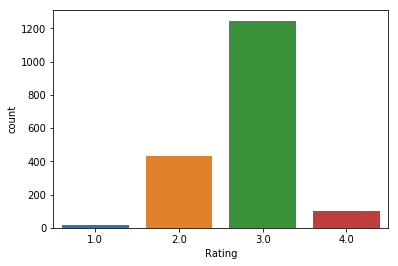

In [29]:
sns.countplot(x = 'Rating', data=data)

#### oversampling
#### undersampling 
#### To balance dataset

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [31]:
X = data.drop('Rating', axis = 1)
y = data['Rating']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Logistic Regression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
prediction = model.predict(X_test)

In [36]:
confusion_matrix(y_test, prediction)

array([[  0,   1,   3,   0],
       [  1,  21, 113,   0],
       [  0,  14, 364,   0],
       [  0,   0,  22,   0]], dtype=int64)

In [37]:
report = classification_report(y_test, prediction)
print(report)
print(accuracy_score(y_test,prediction)*100)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.58      0.16      0.25       135
         3.0       0.73      0.96      0.83       378
         4.0       0.00      0.00      0.00        22

   micro avg       0.71      0.71      0.71       539
   macro avg       0.33      0.28      0.27       539
weighted avg       0.65      0.71      0.64       539

71.42857142857143


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree

[[  1   1   2   0]
 [  4  35  96   0]
 [  1  47 320  10]
 [  1   4  15   2]]
              precision    recall  f1-score   support

         1.0       0.14      0.25      0.18         4
         2.0       0.40      0.26      0.32       135
         3.0       0.74      0.85      0.79       378
         4.0       0.17      0.09      0.12        22

   micro avg       0.66      0.66      0.66       539
   macro avg       0.36      0.36      0.35       539
weighted avg       0.63      0.66      0.64       539

Accuracy: 66.41929499072357


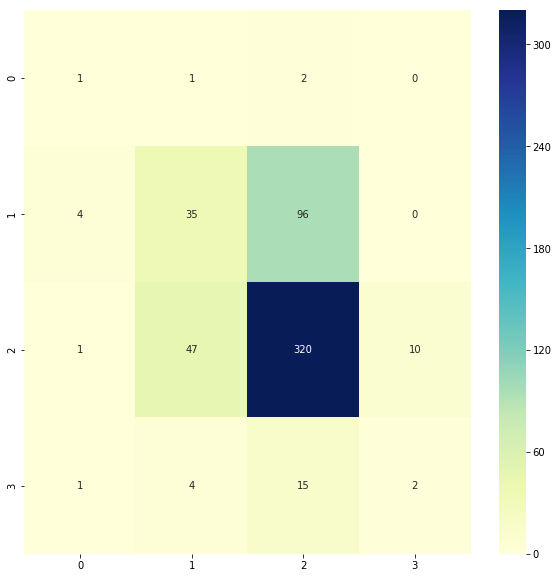

In [38]:
# create model
dtc = DecisionTreeClassifier(random_state=101)
# fit model
dtc.fit(X_train, y_train)
# predict base on test set
dtc_pred = dtc.predict(X_test)

# classification_report confusion_matrix
matrix = confusion_matrix(y_test, dtc_pred)
report = classification_report(y_test, dtc_pred)
print(matrix)
print(report)
print("Accuracy: " + str(accuracy_score(y_test, dtc_pred)*100))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, dtc_pred), cmap="YlGnBu", annot=True, fmt="d")

### Random Forest

In [39]:
#Create model
rfc = RandomForestClassifier(n_estimators=500, min_weight_fraction_leaf= 0)
#Fit model
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
#Predict based on test set
rfc_pred = rfc.predict(X_test)

[[  0   0   4   0]
 [  0  21 114   0]
 [  1  15 359   3]
 [  0   1  19   2]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         4
         2.0       0.57      0.16      0.24       135
         3.0       0.72      0.95      0.82       378
         4.0       0.40      0.09      0.15        22

   micro avg       0.71      0.71      0.71       539
   macro avg       0.42      0.30      0.30       539
weighted avg       0.67      0.71      0.64       539

Accuracy: 70.87198515769944


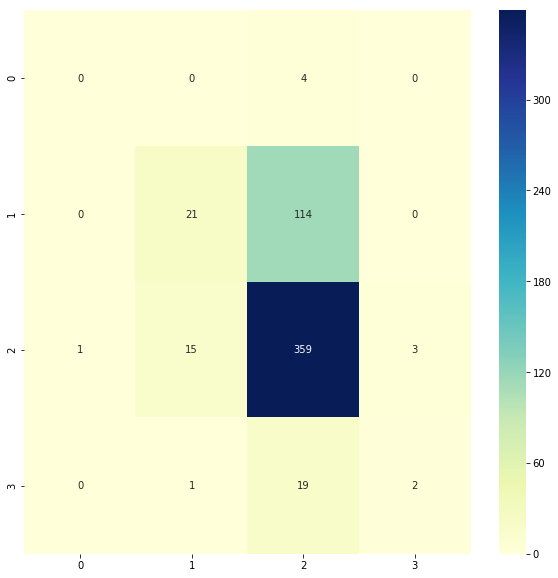

In [41]:
#Confusion matrix, classification report, accuracy score
report = confusion_matrix(y_test, rfc_pred)
print(report)
print(classification_report(y_test,rfc_pred))
print("Accuracy: " + str(accuracy_score(y_test, rfc_pred)*100))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), cmap="YlGnBu", annot=True, fmt="d")

### Further Analysis

[0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945, 0.7087198515769945]


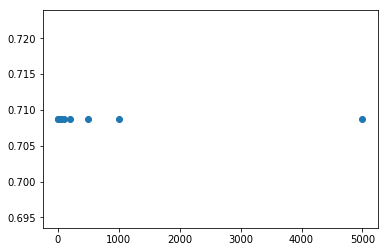

In [42]:
# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500, 1000, 5000]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, rfc_pred))
    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
print(result)

# Conclusion

### Where are the best cocoa beans grown? (Venezuela)
### Which companies produce the highest-rated bars? (Amedai)
### What’s the relationship between cocoa solids percentage and rating? (No obvious relationship)